### Source : http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

In [2]:
path = "/Users/ecem/Desktop/phonocardiogram/data/MV/present"

In [3]:
waves = np.load(path + "/present_MV_waves_10sec.npy", allow_pickle= True)

In [4]:
n = waves.shape[0]

In [5]:
import librosa as lbs

In [6]:
lbs.feature.mfcc(y=waves[0], sr=4000, win_length = 100, n_mfcc=13).shape

(13, 79)

In [7]:
lbs.feature.mfcc(y=waves[0], sr=4000, win_length = 100, n_mfcc=13)[0].mean()

-570.14417

In [8]:
mfccs = lbs.feature.mfcc(y=waves[0], sr=4000, win_length = 100, n_mfcc=13)

In [9]:
import librosa.display

[Text(0.5, 1.0, 'MFCC')]

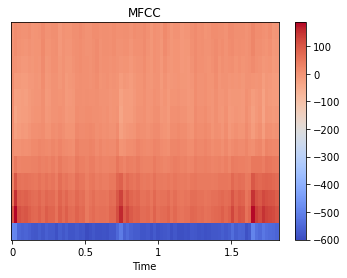

In [10]:
>>> import matplotlib.pyplot as plt
>>> fig, ax = plt.subplots(nrows=1, sharex=True)
>>> img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
>>> fig.colorbar(img, ax=[ax])
>>> ax.set(title='MFCC')

In [11]:
mfccs = np.empty((n, 13))
for i in range(waves.shape[0]):
    mfcc = lbs.feature.mfcc(y=waves[i], sr=4000, win_length = 100, n_mfcc=13)
    for j in range(13):
        mfccs[i, j] = mfcc[j].mean()
    

In [12]:
mfccs.shape

(1080, 13)

In [13]:
import pandas as pd

In [14]:
columns = []
for i in range(13):
    columns.append("{}'th mfcc".format(i))

In [15]:
mfccs_df = pd.DataFrame(mfccs, columns = columns)

In [16]:
mfccs_df

,0'th mfcc,1'th mfcc,2'th mfcc,3'th mfcc,4'th mfcc,5'th mfcc,6'th mfcc,7'th mfcc,8'th mfcc,9'th mfcc,10'th mfcc,11'th mfcc,12'th mfcc
0,-570.144165,84.743477,71.938217,54.359016,35.131275,17.795877,4.943207,-2.238263,-4.102041,-2.192379,1.378472,4.640109,6.301121
1,-660.730103,122.864174,101.045837,71.493896,40.333179,13.909631,-3.546658,-10.750186,-9.339309,-2.903386,4.440372,9.434031,10.530929
2,-752.157959,137.689621,111.488602,76.087448,39.609699,9.926634,-8.099819,-13.600000,-9.393248,-0.472074,7.993968,12.411327,11.657516
3,-688.436584,120.941528,98.116753,67.557632,36.162590,10.347927,-5.934097,-11.729803,-8.991573,-1.636105,5.985434,10.622911,10.974188
4,-750.606812,150.106506,120.090424,79.899033,39.137615,6.703459,-12.292192,-17.400272,-12.155264,-2.169276,7.073528,11.961028,11.507572
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,-613.817383,137.568985,112.259293,78.171791,43.227360,14.914235,-2.319257,-7.835765,-4.352379,3.545585,11.195225,15.348663,14.905712
1076,-611.504028,131.479324,108.664894,77.501869,44.942245,17.842607,0.582132,-5.809008,-3.462720,3.538464,10.793025,15.047919,15.002252
1077,-602.486084,131.042908,107.408821,75.459106,42.442707,15.395052,-1.341553,-6.942268,-3.806942,3.764098,11.268342,15.477941,15.206600
1078,-608.578735,127.779594,105.844131,76.045792,44.900074,18.818014,1.878521,-4.889337,-3.309235,3.001428,10.024223,14.622044,15.310308


In [17]:
mfccs_df.to_csv("/Users/ecem/Desktop/phonocardiogram/data/MV/present/MV-mfcc.csv")